In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('/content/dana-review-playstore.csv', on_bad_lines='skip')

In [25]:
# Menampilkan 5 baris pertama
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,765d2124-4c1c-4460-a60e-a2369072cf69,Agie Grenaldy,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong bantuannya, saya tidak bisa cek riwayat...",2,479,2.69.0,2024-11-28 00:12:02,NaN,NaN,2.69.0
1,0181cba3-2601-4271-9c66-38412e4752e9,artantia wulan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Yang mau instal apk ini mending mikir"" lagi, a...",1,128,2.69.1,2024-12-10 09:51:25,NaN,NaN,2.69.1
2,59208e0c-774c-42ce-b940-5ecc7c486df5,Noviana Pujiansyah,https://play-lh.googleusercontent.com/a-/ALV-U...,suka bangettt sama aplikasi ini memudahkan pen...,5,1293,2.69.0,2024-12-04 21:49:47,"Hi Kak, terima kasih ya sudah mempercayakan DA...",2022-12-06 04:06:45,2.69.0
3,a7571644-8f7b-4500-ad33-0f73b779cd4a,Sartika Nuryani,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa menggunakan data seluler pribadi pasti ...,4,1321,2.69.1,2024-12-07 14:51:57,NaN,NaN,2.69.1
4,7899c62b-8ec4-4ad3-9196-6f7555927fca,Kipas angin,https://play-lh.googleusercontent.com/a/ACg8oc...,HAI min aku mau kasih tahu ada masalah di bagi...,5,225,2.70.0,2024-12-11 11:52:36,NaN,NaN,2.70.0


In [26]:
# Jumlah data sebelum pembersihan
print(f"Jumlah data sebelum pembersihan: {len(data)}")

Jumlah data sebelum pembersihan: 300


In [27]:
print (data.isnull().sum())
print (data.shape)

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            233
repliedAt               233
appVersion                0
dtype: int64
(300, 11)


In [28]:
# Menghapus kolom 'Tanggal'
data = data.drop(columns=['replyContent', 'repliedAt'])

In [29]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,765d2124-4c1c-4460-a60e-a2369072cf69,Agie Grenaldy,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong bantuannya, saya tidak bisa cek riwayat...",2,479,2.69.0,2024-11-28 00:12:02,2.69.0
1,0181cba3-2601-4271-9c66-38412e4752e9,artantia wulan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Yang mau instal apk ini mending mikir"" lagi, a...",1,128,2.69.1,2024-12-10 09:51:25,2.69.1
2,59208e0c-774c-42ce-b940-5ecc7c486df5,Noviana Pujiansyah,https://play-lh.googleusercontent.com/a-/ALV-U...,suka bangettt sama aplikasi ini memudahkan pen...,5,1293,2.69.0,2024-12-04 21:49:47,2.69.0
3,a7571644-8f7b-4500-ad33-0f73b779cd4a,Sartika Nuryani,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa menggunakan data seluler pribadi pasti ...,4,1321,2.69.1,2024-12-07 14:51:57,2.69.1
4,7899c62b-8ec4-4ad3-9196-6f7555927fca,Kipas angin,https://play-lh.googleusercontent.com/a/ACg8oc...,HAI min aku mau kasih tahu ada masalah di bagi...,5,225,2.70.0,2024-12-11 11:52:36,2.70.0


<ipython-input-30-7e3634f37c5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='score', palette='viridis')


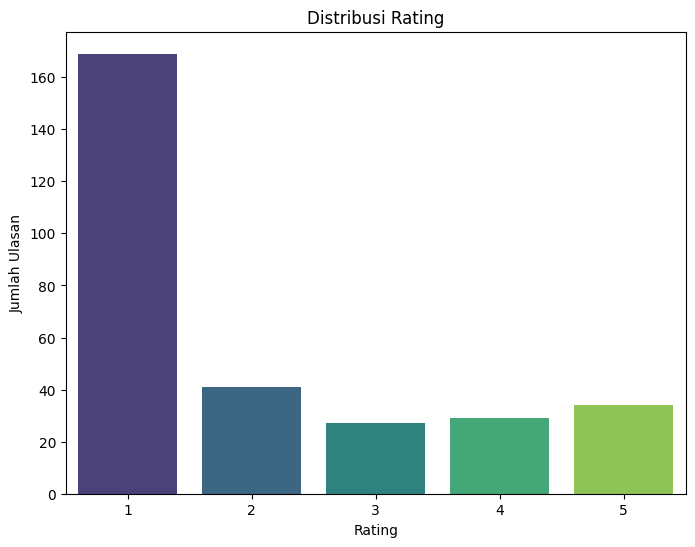

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi rating
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='score', palette='viridis')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah Ulasan")
plt.show()


# **GENERATE WORDCLOUD**

In [31]:
from wordcloud import WordCloud

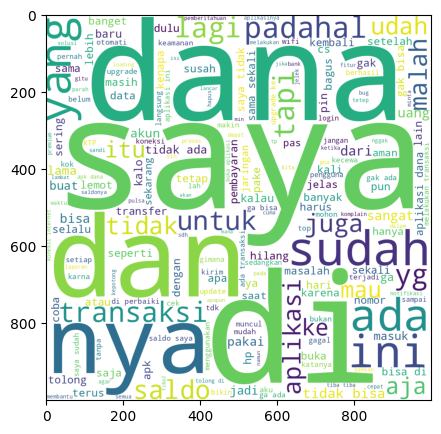

In [32]:
wc=WordCloud(background_color='white',width=1000,height=1000).generate(''.join(data['content']))
plt.figure(figsize=(5,5))
plt.imshow(wc)

# **CLEANING DATA**

In [33]:
!pip install Sastrawi

In [34]:
#Library untuk preprocessing teks
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [35]:
def clean_text(text):
    # mengubah semua karakter huruf menjadi huruf kecil
    text = text.lower()
    # menghilangkan Nama Akun
    text = re.sub('@[^\s]+', '', text)
    # menghilangkan punctuation
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # menghilangkan angka
    text = re.sub('\w*\d\w*', '', text)
    # menghilangkan URL
    text = re.sub(r'\w+://[\d\w-]+(\.[\d\w-]+)*(?:(?:/[^\s/]*)*)', '', text)
    text = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?', '', text)
    # menghilangkan Hashtag
    text = re.sub('#[^\s]+', '', text)
    # menghilangkan Huruf Tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    return text

clean = lambda x: clean_text(x)

In [36]:
dfx = pd.DataFrame(data.content.apply(clean))
dfx

,content
0,"tolong bantuannya, saya tidak bisa cek riwayat..."
1,"yang mau instal apk ini mending mikir"" lagi, a..."
2,suka bangettt sama aplikasi ini memudahkan pen...
3,kenapa menggunakan data seluler pribadi pasti ...
4,hai min aku mau kasih tahu ada masalah di bagi...
...,...
295,kenapa banyak masalah yang pada saat di buka ...
296,"dana sekarang burukk, banyak bug.. setiap mau ..."
297,"aplikasi paling kocak, upgrade akun aja susah ..."
298,mau tanya tolong jawab kenapa saya login malah...


In [37]:
def Punctuation(string):
    # punctuation marks
    punctuations = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''

    # traverse the given string and if any punctuation
    # marks occur replace it with null
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")

    # Print string without punctuation
    return(string)

cleanPunc = lambda x: Punctuation(x)

In [38]:
dfx = pd.DataFrame(dfx.content.apply(cleanPunc))
dfx.head()

,content
0,tolong bantuannya saya tidak bisa cek riwayat ...
1,yang mau instal apk ini mending mikir lagi apa...
2,suka bangettt sama aplikasi ini memudahkan pen...
3,kenapa menggunakan data seluler pribadi pasti ...
4,hai min aku mau kasih tahu ada masalah di bagi...


# **STOPWORD REMOVAL**

In [39]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
def get_stopword(stopwordsfile):
    stopwords = []
    file_stopwords = open(stopwordsfile, 'r')
    row = file_stopwords.readline()
    while row:
        word = row.strip()
        stopwords.append(word)
        row = file_stopwords.readline()
    file_stopwords.close()
    return stopwords

In [41]:
stop_words_indo = get_stopword('/content/stopwordsindo.txt')

In [42]:
def stopwords(text):

  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil = ' '.join(filtered)
  return hasil

st = lambda x: stopwords(x)

In [43]:
dfx = pd.DataFrame(dfx.content.apply(st))
dfx.head()

,content
0,tolong bantuannya tidak cek riwayat transaksi ...
1,instal apk mending mikir apk transaksi pakai b...
2,suka bangettt aplikasi memudahkan penggunanya ...
3,data seluler pribadi muncul tulisan tidak kone...
4,hai min kasih verifikasi wajah udah kali coba ...


# **STEMMING**

In [44]:
def stemming(text):
    factory_stem = StemmerFactory()
    stemmer = factory_stem.create_stemmer()
    text = stemmer.stem(text)
    return text

stem = lambda x: stemming(x)

In [45]:
dfx = pd.DataFrame(dfx.content.apply(stem))
dfx.head()

,content
0,tolong bantu tidak cek riwayat transaksi menu ...
1,instal apk mending mikir apk transaksi pakai j...
2,suka bangettt aplikasi mudah guna depan transa...
3,data seluler pribadi muncul tulis tidak koneks...
4,hai min kasih verifikasi wajah udah kali coba ...


# **GABUNG DENGAN ATRIBUT KELAS**

In [46]:
dfx["score"] = data["score"]
dfx

,content,score
0,tolong bantu tidak cek riwayat transaksi menu ...,2
1,instal apk mending mikir apk transaksi pakai j...,1
2,suka bangettt aplikasi mudah guna depan transa...,5
3,data seluler pribadi muncul tulis tidak koneks...,4
4,hai min kasih verifikasi wajah udah kali coba ...,5
...,...,...
295,buka apk nya muncul koneksi putus jaring stabi...,5
296,dana burukk bug transfer tidak karna koneksi t...,1
297,aplikasi kocak upgrade akun aja susah bener bl...,1
298,tolong login jaring putus kuota sinyal bagus j...,1


In [47]:
dfx.to_csv('data_bersih.csv', index=False)

# **PELABELAN**

In [57]:
dfx = pd.read_csv('data_bersih.csv', sep=';')  # Ganti dengan nama file Anda

In [58]:
dfx.head()

,content,score,sentimen
0,tolong bantu tidak cek riwayat transaksi menu ...,2,Tidak Bisa Dipercaya
1,instal apk mending mikir apk transaksi pakai j...,1,Tidak Bisa Dipercaya
2,suka bangettt aplikasi mudah guna depan transa...,5,Bisa Dipercaya
3,data seluler pribadi muncul tulis tidak koneks...,4,Tidak Bisa Dipercaya
4,hai min kasih verifikasi wajah udah kali coba ...,5,Bisa Dipercaya


# **EDA (EXPLORATORY DATA ANALYSIS)**

In [59]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   300 non-null    object
 1   score     300 non-null    int64 
 2   sentimen  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [60]:
# Jumlah baris dan kolom
print(f"Jumlah baris: {dfx.shape[0]}, Jumlah kolom: {dfx.shape[1]}")

Jumlah baris: 300, Jumlah kolom: 3


In [61]:
# Tipe data setiap kolom
print(dfx.dtypes)

content     object
score        int64
sentimen    object
dtype: object


In [62]:
# Lihat nama kolom
print(dfx.columns)

Index(['content', 'score', 'sentimen'], dtype='object')


In [63]:
# Periksa contoh data untuk kolom review dan rating
print(dfx[['content', 'score']].head())

                                             content  score
0  tolong bantu tidak cek riwayat transaksi menu ...      2
1  instal apk mending mikir apk transaksi pakai j...      1
2  suka bangettt aplikasi mudah guna depan transa...      5
3  data seluler pribadi muncul tulis tidak koneks...      4
4  hai min kasih verifikasi wajah udah kali coba ...      5


In [64]:
data.describe()

,score,thumbsUpCount
count,300.000000,300.000000
mean,2.060000,140.210000
std,1.436411,415.573021
min,1.000000,0.000000
25%,1.000000,2.000000
50%,1.000000,15.000000
75%,3.000000,69.750000
max,5.000000,3174.000000


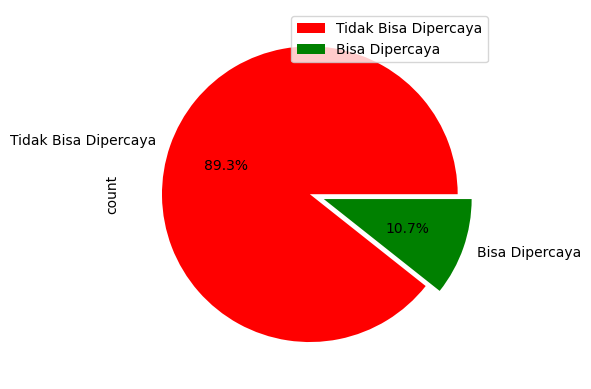

In [65]:
dfx['sentimen'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0,0.1], colors=['red', 'green'])
plt.legend(['Tidak Bisa Dipercaya', 'Bisa Dipercaya'])
plt.show()

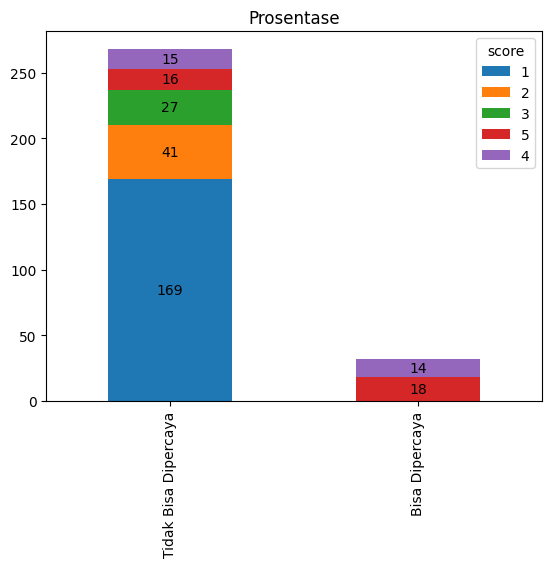

In [66]:
def sentimen_stacked_bar (variable):
    tbd=dfx[dfx['sentimen']=='Tidak Bisa Dipercaya'][variable].value_counts()
    bd=dfx[dfx['sentimen']=='Bisa Dipercaya'][variable].value_counts()
    dataset=pd.DataFrame([tbd,bd])
    dataset.index=['Tidak Bisa Dipercaya', 'Bisa Dipercaya']
    ax = dataset.plot(kind='bar', stacked=True, title='Prosentase')

    # Add data labels
    for i, container in enumerate(ax.containers):
        # Loop over individual bar segments
        for j, bar in enumerate(container.patches):
            height = bar.get_height()
            if height > 0: # Only label bars with height greater than 0
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                        int(height),  # Display actual value
                        ha='center', va='center', fontsize=10, color='black')

    plt.show()

sentimen_stacked_bar('score')

# **Permodelan Algoritma**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [68]:
xdata = dfx.drop('sentimen', axis=1)
ydata = dfx['sentimen']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [70]:
vectorizer = TfidfVectorizer()
xtrain_vec = vectorizer.fit_transform(xtrain['content'])  # Fit on training data
xtest_vec = vectorizer.transform(xtest['content'])  # Transform testing data

In [71]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(xtrain_vec, ytrain)  # Use the vectorized training data

RandomForestClassifier()

In [72]:
y_pred_rf = model_rf.predict(xtest_vec)

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
import numpy as np
xcontent = dfx['content']
xdata_vec = vectorizer.fit_transform(xcontent)
xscore = dfx['score'].values.reshape(-1, 1)
X = np.hstack((xdata_vec.toarray(), xscore))

In [75]:
rf_clf = RandomForestClassifier()

In [76]:
scores_accuracy = cross_val_score(rf_clf, xdata_vec, ydata, cv=5, scoring='accuracy')
print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

[0.9        0.9        0.9        0.88333333 0.88333333]
Rata-Rata Nilai Akurasi: 0.89 (+/- 0.01)


In [77]:
scores_precision = cross_val_score(rf_clf, xdata_vec, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

[0.45       0.45       0.45       0.44166667 0.44166667]
Rata-Rata Nilai Precision Macro: 0.45 (+/- 0.00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
scores_recall = cross_val_score(rf_clf, xdata_vec, ydata, cv=5, scoring="recall_macro")
print(scores_recall)
print("Rata-Rata Nilai Recall Marco: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

[0.5 0.5 0.5 0.5 0.5]
Rata-Rata Nilai Recall Marco: 0.50 (+/- 0.00)


In [79]:
scores_f1 = cross_val_score(rf_clf, xdata_vec, ydata, cv=5, scoring="f1_macro")
print(scores_f1)
print("Rata-Rata Nilai f1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.47368421 0.47368421 0.47368421 0.46902655 0.46902655]
Rata-Rata Nilai f1 Macro: 0.47 (+/- 0.00)


# **Permodelan Algoritma (Decision Tree)**

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
dt_clf = DecisionTreeClassifier()

In [82]:
dt_clf.fit(xtrain_vec, ytrain)

DecisionTreeClassifier()

In [83]:
dt_pred = dt_clf.predict(xtest_vec)

In [84]:
scores_accuracy = cross_val_score(dt_clf, X, ydata, cv=5, scoring='accuracy')
print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

[0.98333333 0.96666667 0.96666667 0.95       0.96666667]
Rata-Rata Nilai Akurasi: 0.97 (+/- 0.01)


In [85]:
scores_precision = cross_val_score(dt_clf, X, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

[0.92857143 0.99090909 0.875      0.97321429 0.91913747]
Rata-Rata Nilai Precision Macro: 0.94 (+/- 0.04)


In [86]:
scores_recall = cross_val_score(dt_clf, X, ydata, cv=5, scoring="recall_macro")
print(scores_recall)
print("Rata-Rata Nilai Recall Marco: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

[0.99074074 0.90740741 0.98148148 0.78571429 0.91913747]
Rata-Rata Nilai Recall Marco: 0.92 (+/- 0.07)


In [87]:
scores_f1 = cross_val_score(dt_clf, X, ydata, cv=5, scoring="f1_macro")
print(scores_f1)
print("Rata-Rata Nilai f1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.95686556 0.9499583  0.91913747 0.8498749  0.91913747]
Rata-Rata Nilai f1 Macro: 0.92 (+/- 0.04)


In [88]:
dt_clf.fit(X, ydata)

DecisionTreeClassifier()

# **Permodelan Algoritma (Naive Bayes)**

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [90]:
nb_model = MultinomialNB()

In [91]:
#melatih model dengan data pelatihan
nb_model.fit(xtrain_vec, ytrain) # Convert xtrain_vec to a dense array using .toarray()

MultinomialNB()

In [92]:
NB_pred = nb_model.predict(xtest_vec) # Use xtest_vec instead of xtrain_vec

In [93]:
scores_accuracy = cross_val_score(nb_model, xdata_vec, ydata, cv=5, scoring='accuracy')
print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

[0.9        0.9        0.9        0.88333333 0.88333333]
Rata-Rata Nilai Akurasi: 0.89 (+/- 0.01)


In [94]:
scores_precision = cross_val_score(nb_model, xdata_vec, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

[0.45       0.45       0.45       0.44166667 0.44166667]
Rata-Rata Nilai Precision Macro: 0.45 (+/- 0.00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [95]:
scores_recall = cross_val_score(nb_model, xdata_vec, ydata, cv=5, scoring="recall_macro")
print(scores_recall)
print("Rata-Rata Nilai Recall Marco: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

[0.5 0.5 0.5 0.5 0.5]
Rata-Rata Nilai Recall Marco: 0.50 (+/- 0.00)


In [96]:
scores_f1 = cross_val_score(nb_model, xdata_vec, ydata, cv=5, scoring="f1_macro")
print(scores_f1)
print("Rata-Rata Nilai f1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.47368421 0.47368421 0.47368421 0.46902655 0.46902655]
Rata-Rata Nilai f1 Macro: 0.47 (+/- 0.00)


In [97]:
# Menyimpan model menggunakan pickle
import pickle

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Simpan model
with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(dt_clf, file)